In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [54]:
%matplotlib inline

In [55]:
df = pd.read_csv('data/washington_hikes_clean_noout.csv', )

In [56]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,hike_name,region,length,elevation gain,rating,number_votes,features,...,which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long,hike_id
0,0,0,0,Grand Park via Lake Eleanor,Mount Rainier Area -- NE - Sunrise/White River,"8.0 miles, roundtrip",1100.0,4.25 out of 5,12.0,"[Mountain views, Wildlife, Established campsites]",...,No pass or permit required,116.533333,http://www.wta.org/go-hiking/hikes/grand-park,http://maps.google.com/maps?hl=en&sz=11&spn=0....,212.0,The classic approach (via Sunrise) to this sea...,4.25,8.0,"46.9963,-121.6413",0
1,1,1,1,Shellrock Pass,North Cascades -- Pasayten,NaN,NaN,2.33 out of 5,3.0,[Dogs allowed on leash],...,No pass or permit required,NaN,http://www.wta.org/go-hiking/hikes/shellrock-pass,NaN,2.0,The Shellrock Pass trail has not been maintain...,2.33,NaN,NaN,1
2,2,2,2,Soda Peaks Lake,Southwest Washington -- Lewis River Region,"7.0 miles, roundtrip",2500.0,3.00 out of 5,4.0,"[Old growth, Lakes]",...,Northwest Forest Pass required,227.333333,http://www.wta.org/go-hiking/hikes/soda-peaks-...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,24.0,Take a trip to a seldom-seen part of the South...,3.00,7.0,"45.8846,-122.0001",2
3,3,3,3,Shorthorn,South Cascades -- Mount Adams Area,"5.6 miles, roundtrip",1400.0,3.67 out of 5,3.0,"[Mountain views, Dogs allowed on leash]",...,Northwest Forest Pass required,207.433333,http://www.wta.org/go-hiking/hikes/shorthorn,http://maps.google.com/maps?hl=en&sz=11&spn=0....,5.0,This trail ascends the south slopes of Mount A...,3.67,5.6,"46.1989,-121.0593",3
4,4,4,4,West Fork Teanaway River,Snoqualmie Region -- Salmon La Sac/Teanaway,"9.6 miles, one-way",2800.0,2.75 out of 5,4.0,"[Ridges/passes, Wildlife, Established campsite...",...,Northwest Forest Pass required,115.750000,http://www.wta.org/go-hiking/hikes/west-fork-t...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,5.0,The West Fork Teanaway Trail begins at Forest ...,2.75,19.2,"47.2915,-121.0064",4


In [60]:

features = []
for f in df['features']:
    flist = f.strip('[').strip(']').split(',')
    features.extend(flist)
features = list(np.unique([f.lstrip() for f in features if f != '']))
for f in features:
    df[f] = [1 if f in t else 0 for t in df['features']]


In [61]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,hike_name,region,length,elevation gain,rating,number_votes,features,...,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife
0,0,0,0,Grand Park via Lake Eleanor,Mount Rainier Area -- NE - Sunrise/White River,"8.0 miles, roundtrip",1100.0,4.25 out of 5,12.0,"[Mountain views, Wildlife, Established campsites]",...,0,0,1,0,0,0,0,0,0,1
1,1,1,1,Shellrock Pass,North Cascades -- Pasayten,NaN,NaN,2.33 out of 5,3.0,[Dogs allowed on leash],...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,Soda Peaks Lake,Southwest Washington -- Lewis River Region,"7.0 miles, roundtrip",2500.0,3.00 out of 5,4.0,"[Old growth, Lakes]",...,0,1,0,1,0,0,0,0,0,0
3,3,3,3,Shorthorn,South Cascades -- Mount Adams Area,"5.6 miles, roundtrip",1400.0,3.67 out of 5,3.0,"[Mountain views, Dogs allowed on leash]",...,0,0,1,0,0,0,0,0,0,0
4,4,4,4,West Fork Teanaway River,Snoqualmie Region -- Salmon La Sac/Teanaway,"9.6 miles, one-way",2800.0,2.75 out of 5,4.0,"[Ridges/passes, Wildlife, Established campsite...",...,1,0,1,0,1,0,0,0,0,1


In [57]:
createFeatureVariables(df)

TypeError: list indices must be integers, not str

In [58]:
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'hike_name',
       u'region', u'length', u'elevation gain', u'rating', u'number_votes',
       u'features', u'pass(0-no pass, 1- pass required)', u'which_pass',
       u'time_from_seattle', u'url', u'latlong', u'numReports', u'hike_desc',
       u'stars', u'total_dist', u'lat_long', u'hike_id'],
      dtype='object')

In [10]:
df.drop(labels=['Unnamed: 0'], inplace=True, axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 33 columns):
Unnamed: 0.1                         3337 non-null int64
hike_name                            3337 non-null object
region                               3335 non-null object
length                               1545 non-null object
elevation gain                       1545 non-null float64
rating                               3336 non-null object
number_votes                         3336 non-null float64
features                             3337 non-null object
pass(0-no pass, 1- pass required)    3337 non-null int64
which_pass                           1486 non-null object
time_from_seattle                    2096 non-null float64
url                                  3337 non-null object
latlong                              2151 non-null object
numReports                           3336 non-null float64
hike_desc                            1398 non-null object
stars                

## PCA and clustering

In [62]:
X = df[[u'elevation gain', u'number_votes',  
       u'time_from_seattle', u'numReports', 
       u'stars', u'total_dist', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife']]

In [63]:
X = X.dropna()
pca = PCA(n_components=8).fit_transform(X)

In [64]:
kmeans = KMeans(n_clusters=5).fit(X)

In [65]:
X['kmeans_label'] = kmeans.labels_

In [66]:
color_map = {0: 'green', 1: 'red', 2: 'yellow', 3: 'blue', 4: 'purple'}

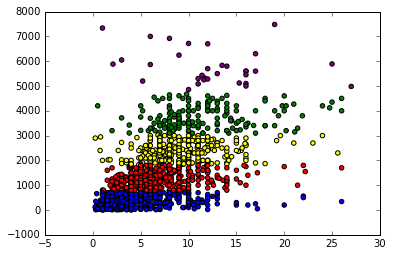

In [67]:
plt.scatter(X['total_dist'],X['elevation gain'], c=X['kmeans_label'].map(color_map))

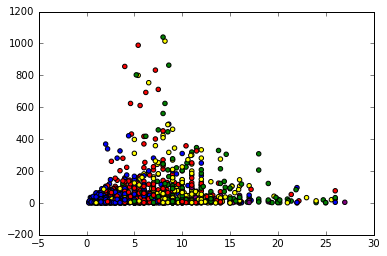

In [68]:
plt.scatter(X['total_dist'],X['numReports'], c=X['kmeans_label'].map(color_map))

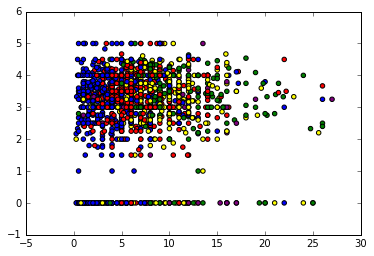

In [69]:
plt.scatter(X['total_dist'],X['stars'], c=X['kmeans_label'].map(color_map))

## Trying a linear regression model

In [70]:
import statsmodels.api as sms
from sklearn.cross_validation import train_test_split

In [71]:
df = df.dropna()
X = df[[u'elevation gain', u'number_votes',  
       u'time_from_seattle', u'numReports', 
        u'total_dist', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife']]
X = sms.add_constant(X)
y = df.stars

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = sms.OLS(y_train, X_train).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  stars   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     5.327
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           3.59e-12
Time:                        19:39:43   Log-Likelihood:                -1137.6
No. Observations:                 687   AIC:                             2315.
Df Residuals:                     667   BIC:                             2406.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.6097      0.148     17.631      0.000       2.319       2.900
elevation gain         7.811e-05   5.13e-05      1.523      0.128   -2.26e-05       0.000
number_votes              0.0104      0.006      1.722      0.086      -0.001       0.022
time_from_seattle        -0.0005      0.000     -1.186      0.236      -0.001       0.000
numReports                0.0014      0.001      1.543      0.123      -0.000       0.003
total_dist               -0.0098      0.014     -0.705      0.481      -0.037       0.018
Coast                     0.4096      0.418      0.980      0.328      -0.411       1.231
Dogs allowed on leash    -0.0598      0.105     -0.568      0.570      -0.266       0.147
Established campsites     0.1529      0.143      1.067      0.286      -0.129       0.434
Fall foliage              0.0772      0.146      0.528      0.597      -0.210       0.364
Good for kids             0.0081      0.128      0.063      0.950      -0.243       0.259
Lakes                     0.1902      0.123      1.551      0.121      -0.051       0.431
Mountain views            0.2103      0.116      1.812      0.070      -0.018       0.438
Old growth                0.0081      0.119      0.068      0.946      -0.225       0.241
Ridges/passes            -0.0768      0.173     -0.443      0.658      -0.417       0.263
Rivers                   -0.0573      0.156     -0.366      0.714      -0.364       0.250
Summits                   0.1645      0.141      1.165      0.244      -0.113       0.442
Waterfalls                0.2161      0.171      1.267      0.206      -0.119       0.551
Wildflowers/Meadows      -0.2033      0.340     -0.598      0.550      -0.871       0.464
Wildlife                 -0.0457      0.109     -0.418      0.676      -0.260       0.169
==============================================================================
Omnibus:                       89.611   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.920
Skew:                          -1.017   Prob(JB):                     2.03e-27
Kurtosis:                       3.397   Cond. No.                     1.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, LassoLars
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [75]:
lasso = ['Lasso', LassoCV()]
ridge = ['Ridge', RidgeCV()]
linreg = ['Linear Regression', LinearRegression()]
models = [lasso, ridge, linreg]

In [76]:
for mod in models:
    print mod[0]
    m = mod[1].fit(X_train, y_train)
    print 'R^2: ', m.score(X_train, y_train)
    print 'MSE: ', mean_squared_error(y_test, m.predict(X_test))
    print '-----------------------------------------------------'

Lasso
R^2:  0.109502556237
MSE:  1.71085765674
-----------------------------------------------------
Ridge
R^2:  0.131174819333
MSE:  1.68888460623
-----------------------------------------------------
Linear Regression
R^2:  0.131747442767
MSE:  1.69262634732
-----------------------------------------------------


## Trying an ensemble model

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
gb = GradientBoostingRegressor(min_samples_leaf=3, random_state=0).fit(X_train, y_train)

In [79]:
feat_imp = gb.feature_importances_

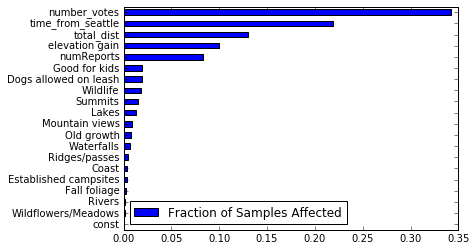

In [80]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gb.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

In [81]:
df.corr()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1,elevation gain,number_votes,"pass(0-no pass, 1- pass required)",time_from_seattle,numReports,stars,total_dist,...,Good for kids,Lakes,Mountain views,Old growth,Ridges/passes,Rivers,Summits,Waterfalls,Wildflowers/Meadows,Wildlife
Unnamed: 0,1.000000,0.999990,0.999990,-0.001131,-0.274210,0.036186,0.056072,-0.276848,-0.188907,0.021058,...,-0.056907,0.018371,0.028981,-0.089272,0.023865,-0.052721,-0.002827,-0.115572,-0.048756,0.006257
Unnamed: 0.1,0.999990,1.000000,1.000000,-0.001036,-0.273673,0.036412,0.055843,-0.276313,-0.189163,0.020895,...,-0.056997,0.018533,0.029133,-0.089065,0.023738,-0.052741,-0.002797,-0.115253,-0.048613,0.006142
Unnamed: 0.1,0.999990,1.000000,1.000000,-0.001036,-0.273673,0.036412,0.055843,-0.276313,-0.189163,0.020895,...,-0.056997,0.018533,0.029133,-0.089065,0.023738,-0.052741,-0.002797,-0.115253,-0.048613,0.006142
elevation gain,-0.001131,-0.001036,-0.001036,1.000000,0.090127,0.191457,0.036247,0.175493,0.147740,0.572975,...,-0.510971,0.070865,0.310180,0.081142,0.191112,0.070547,0.327802,0.052292,0.169256,-0.136024
number_votes,-0.274210,-0.273673,-0.273673,0.090127,1.000000,0.125074,-0.131353,0.883164,0.306889,0.002450,...,0.040765,0.118780,0.133675,0.141670,0.044927,0.127253,0.086981,0.253466,0.121301,-0.035613
"pass(0-no pass, 1- pass required)",0.036186,0.036412,0.036412,0.191457,0.125074,1.000000,0.112662,0.141193,0.187427,0.186992,...,-0.197110,0.103268,0.149664,0.083890,0.077781,0.113033,0.048853,0.079688,0.057519,-0.032711
time_from_seattle,0.056072,0.055843,0.055843,0.036247,-0.131353,0.112662,1.000000,-0.188890,-0.073671,0.130359,...,-0.087356,-0.040721,0.118129,-0.008148,0.059556,-0.013340,0.018487,0.008973,0.002673,0.057343
numReports,-0.276848,-0.276313,-0.276313,0.175493,0.883164,0.141193,-0.188890,1.000000,0.324390,0.054647,...,-0.004827,0.148589,0.185112,0.183854,0.061410,0.122481,0.110998,0.281084,0.144823,-0.056178
stars,-0.188907,-0.189163,-0.189163,0.147740,0.306889,0.187427,-0.073671,0.324390,1.000000,0.078696,...,-0.082747,0.091674,0.146516,0.078843,0.041264,0.054745,0.100032,0.144824,0.075233,-0.039764
total_dist,0.021058,0.020895,0.020895,0.572975,0.002450,0.186992,0.130359,0.054647,0.078696,1.000000,...,-0.356723,0.124173,0.222153,0.141721,0.154323,0.147947,0.118317,0.143653,0.171904,-0.019508


Looks like number of votes and number of reports is highly correlated.  Will remove number of votes.

In [82]:
## Features that will be used on my model
feat_scores[-10:]

,Fraction of Samples Affected
Lakes,0.012988
Summits,0.015512
Wildlife,0.018333
Dogs allowed on leash,0.019201
Good for kids,0.019313
numReports,0.083053
elevation gain,0.099876
total_dist,0.129735
time_from_seattle,0.219355
number_votes,0.342027


## Create item dataframe

In [ ]:
df = pd.read_csv('data/washington_hikes_clean_noout.csv')

features = []
for f in df['features']:
    flist = f.strip('[').strip(']').split(',')
    features.extend(flist)
features = list(np.unique([f.lstrip() for f in features if f != '']))
for f in features:
    df[f] = [1 if f in t else 0 for t in df['features']]

In [85]:
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'hike_name',
       u'region', u'length', u'elevation gain', u'rating', u'number_votes',
       u'features', u'pass(0-no pass, 1- pass required)', u'which_pass',
       u'time_from_seattle', u'url', u'latlong', u'numReports', u'hike_desc',
       u'stars', u'total_dist', u'lat_long', u'hike_id', u'Coast',
       u'Dogs allowed on leash', u'Established campsites', u'Fall foliage',
       u'Good for kids', u'Lakes', u'Mountain views', u'Old growth',
       u'Ridges/passes', u'Rivers', u'Summits', u'Waterfalls',
       u'Wildflowers/Meadows', u'Wildlife'],
      dtype='object')

In [86]:
df['hike_id'] = range(len(df))
item_data = df[['hike_name', 'hike_id', 'numReports', 'total_dist', 'elevation gain', 'time_from_seattle', 'Wildlife','Rivers','Summits', 'Good for kids']]

item_data.to_csv('data/itemData.csv')

In [35]:
from gensim import corpora, models, similarities

In [36]:
corpus = corpora.MmCorpus
tfidf = models.TfidfModel(corpus)

TypeError: 'type' object is not iterable